# Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import warnings
warnings.filterwarnings('ignore')

In [2]:
from keras import datasets

# Import Dataset

In [3]:
data = pd.read_csv("Churn_Modelling.csv")
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
# we will copy the data to new dataframe to use it.
df = data.copy()
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [5]:
df = df.drop(['RowNumber','CustomerId','Surname'], axis=1)
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


# Data Preprocessing

In [6]:
categorical_data= df[['Geography','Gender']]
categorical_data

,Geography,Gender
0,France,Female
1,Spain,Female
2,France,Female
3,France,Female
4,Spain,Female
...,...,...
9995,France,Male
9996,France,Male
9997,France,Female
9998,Germany,Male


In [7]:
numerical_data= df.drop(categorical_data, axis= 1)
numerical_data

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,42,2,0.00,1,1,1,101348.88,1
1,608,41,1,83807.86,1,0,1,112542.58,0
2,502,42,8,159660.80,3,1,0,113931.57,1
3,699,39,1,0.00,2,0,0,93826.63,0
4,850,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0
9996,516,35,10,57369.61,1,1,1,101699.77,0
9997,709,36,7,0.00,1,0,1,42085.58,1
9998,772,42,3,75075.31,2,1,0,92888.52,1


In [8]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [9]:
label_encoder=categorical_data.apply(le.fit_transform)
label_encoder

,Geography,Gender
0,0,0
1,2,0
2,0,0
3,0,0
4,2,0
...,...,...
9995,0,1
9996,0,1
9997,0,0
9998,1,1


In [10]:
en = preprocessing.OneHotEncoder()

In [11]:
en.fit(label_encoder)

OneHotEncoder()

In [12]:
onehotlabels = en.transform(label_encoder).toarray()
onehotlabels

array([[1., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 1., 0.],
       ...,
       [1., 0., 0., 1., 0.],
       [0., 1., 0., 0., 1.],
       [1., 0., 0., 1., 0.]])

In [13]:
onehotlabel = pd.DataFrame(onehotlabels)
onehotlabel

,0,1,2,3,4
0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,1.0,0.0
2,1.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...
9995,1.0,0.0,0.0,0.0,1.0
9996,1.0,0.0,0.0,0.0,1.0
9997,1.0,0.0,0.0,1.0,0.0
9998,0.0,1.0,0.0,0.0,1.0


In [14]:
data_encoded=pd.concat([numerical_data, onehotlabel], axis=1)
data_encoded

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,0,1,2,3,4
0,619,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0,1.0,0.0
1,608,41,1,83807.86,1,0,1,112542.58,0,0.0,0.0,1.0,1.0,0.0
2,502,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,0.0,1.0,0.0
3,699,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,0.0,1.0,0.0
4,850,43,2,125510.82,1,1,1,79084.10,0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,1.0,0.0,0.0,0.0,1.0
9996,516,35,10,57369.61,1,1,1,101699.77,0,1.0,0.0,0.0,0.0,1.0
9997,709,36,7,0.00,1,0,1,42085.58,1,1.0,0.0,0.0,1.0,0.0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0.0,1.0,0.0,0.0,1.0


In [15]:
data_encoded.Age.value_counts()

37    478
38    477
35    474
36    456
34    447
     ... 
92      2
82      1
88      1
85      1
83      1
Name: Age, Length: 70, dtype: int64

In [16]:
#Create a column for ptients >30 years and <30 years.
data_encoded['Age'] = [2 if each < 30 else 1 for each in data_encoded['Age']]

In [17]:
data_encoded

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,0,1,2,3,4
0,619,1,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0,1.0,0.0
1,608,1,1,83807.86,1,0,1,112542.58,0,0.0,0.0,1.0,1.0,0.0
2,502,1,8,159660.80,3,1,0,113931.57,1,1.0,0.0,0.0,1.0,0.0
3,699,1,1,0.00,2,0,0,93826.63,0,1.0,0.0,0.0,1.0,0.0
4,850,1,2,125510.82,1,1,1,79084.10,0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,5,0.00,2,1,0,96270.64,0,1.0,0.0,0.0,0.0,1.0
9996,516,1,10,57369.61,1,1,1,101699.77,0,1.0,0.0,0.0,0.0,1.0
9997,709,1,7,0.00,1,0,1,42085.58,1,1.0,0.0,0.0,1.0,0.0
9998,772,1,3,75075.31,2,1,0,92888.52,1,0.0,1.0,0.0,0.0,1.0


# Split the Data to train & test & Validation

In [18]:
# we will split first the data into x & y
# y is the target column
y = data_encoded['Exited']
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [19]:
# Look at y
y.shape

(10000,)

In [20]:
x = data_encoded.drop('Exited' , axis = 1)
x

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,0,1,2,3,4
0,619,1,2,0.00,1,1,1,101348.88,1.0,0.0,0.0,1.0,0.0
1,608,1,1,83807.86,1,0,1,112542.58,0.0,0.0,1.0,1.0,0.0
2,502,1,8,159660.80,3,1,0,113931.57,1.0,0.0,0.0,1.0,0.0
3,699,1,1,0.00,2,0,0,93826.63,1.0,0.0,0.0,1.0,0.0
4,850,1,2,125510.82,1,1,1,79084.10,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,5,0.00,2,1,0,96270.64,1.0,0.0,0.0,0.0,1.0
9996,516,1,10,57369.61,1,1,1,101699.77,1.0,0.0,0.0,0.0,1.0
9997,709,1,7,0.00,1,0,1,42085.58,1.0,0.0,0.0,1.0,0.0
9998,772,1,3,75075.31,2,1,0,92888.52,0.0,1.0,0.0,0.0,1.0


In [21]:
# Look at x.
x.shape

(10000, 13)

In [22]:
# second we will take 20% from the data to x_test & y_test Randomly.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [23]:
# Look at the shape.
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((8000, 13), (2000, 13), (8000,), (2000,))

In [24]:
# Third split x_train & y_train into x_valid, y_valid & xnew_train, ynew_train.
# we will use it after splitting in the model.
xnew_train, x_valid, ynew_train, y_valid = train_test_split(x_train, y_train, test_size=0.3, random_state=42)

In [25]:
# Look at the shape.
xnew_train.shape, x_valid.shape, ynew_train.shape, y_valid.shape

((5600, 13), (2400, 13), (5600,), (2400,))

Look at the Data

In [26]:
xnew_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,0,1,2,3,4
2983,523,1,8,138782.76,1,1,1,186118.93,0.0,1.0,0.0,0.0,1.0
3488,587,1,3,83286.56,1,1,0,125553.52,0.0,0.0,1.0,1.0,0.0
5575,656,1,2,0.00,2,1,1,180553.48,1.0,0.0,0.0,0.0,1.0
4937,577,1,3,121092.47,2,0,1,143783.46,1.0,0.0,0.0,0.0,1.0
9356,373,1,7,0.00,1,1,0,77786.37,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8871,466,1,3,0.00,1,1,0,193984.60,1.0,0.0,0.0,1.0,0.0
9826,789,1,4,0.00,2,1,0,137402.27,0.0,0.0,1.0,1.0,0.0
5268,691,2,1,0.00,2,0,0,92865.41,1.0,0.0,0.0,0.0,1.0
9666,758,1,5,0.00,2,1,0,95009.60,0.0,0.0,1.0,0.0,1.0


In [27]:
x_valid

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,0,1,2,3,4
3188,801,1,4,75170.54,1,1,1,37898.50,1.0,0.0,0.0,1.0,0.0
8293,766,2,4,90696.78,1,0,1,21597.20,0.0,1.0,0.0,1.0,0.0
1710,828,2,8,134766.85,1,1,0,79355.87,0.0,0.0,1.0,0.0,1.0
7510,798,1,1,0.00,2,1,1,159044.10,1.0,0.0,0.0,0.0,1.0
1461,611,1,4,0.00,2,1,0,170950.58,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4225,648,1,8,146943.38,2,1,1,130041.45,0.0,0.0,1.0,0.0,1.0
2814,737,1,2,162485.80,2,1,0,149381.32,0.0,1.0,0.0,1.0,0.0
3838,628,1,4,122227.71,1,0,1,14217.77,0.0,1.0,0.0,0.0,1.0
9145,712,1,6,112994.65,1,0,0,198398.68,0.0,0.0,1.0,0.0,1.0


In [28]:
ynew_train

2983    0
3488    0
5575    0
4937    0
9356    1
       ..
8871    0
9826    0
5268    0
9666    0
6090    0
Name: Exited, Length: 5600, dtype: int64

In [29]:
y_valid

3188    0
8293    0
1710    0
7510    0
1461    0
       ..
4225    0
2814    0
3838    1
9145    0
8673    1
Name: Exited, Length: 2400, dtype: int64

# Normalization

In [30]:
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot

In [31]:
# perform a robust scaler transform of the dataset
trans = MinMaxScaler()
x_trainscal = trans.fit_transform(xnew_train)
x_trainscal

array([[0.346, 0.   , 0.8  , ..., 0.   , 0.   , 1.   ],
       [0.474, 0.   , 0.3  , ..., 1.   , 1.   , 0.   ],
       [0.612, 0.   , 0.2  , ..., 0.   , 0.   , 1.   ],
       ...,
       [0.682, 1.   , 0.1  , ..., 0.   , 0.   , 1.   ],
       [0.816, 0.   , 0.5  , ..., 1.   , 0.   , 1.   ],
       [0.39 , 1.   , 0.7  , ..., 0.   , 0.   , 1.   ]])

In [32]:
x_validscal = trans.transform(x_valid)
x_validscal

array([[0.902, 0.   , 0.4  , ..., 0.   , 1.   , 0.   ],
       [0.832, 1.   , 0.4  , ..., 0.   , 1.   , 0.   ],
       [0.956, 1.   , 0.8  , ..., 1.   , 0.   , 1.   ],
       ...,
       [0.556, 0.   , 0.4  , ..., 0.   , 0.   , 1.   ],
       [0.724, 0.   , 0.6  , ..., 1.   , 0.   , 1.   ],
       [0.83 , 0.   , 0.1  , ..., 0.   , 1.   , 0.   ]])

In [46]:
x_testscal = trans.transform(x_test)
x_testscal

array([[0.492, 0.   , 0.3  , ..., 0.   , 0.   , 1.   ],
       [0.546, 0.   , 0.1  , ..., 0.   , 0.   , 1.   ],
       [0.502, 0.   , 0.4  , ..., 1.   , 1.   , 0.   ],
       ...,
       [0.76 , 0.   , 0.7  , ..., 0.   , 1.   , 0.   ],
       [0.684, 1.   , 0.4  , ..., 0.   , 0.   , 1.   ],
       [0.556, 0.   , 0.1  , ..., 0.   , 0.   , 1.   ]])

# Train the model

In [33]:
#  Design Model

from keras import layers

In [34]:
# Define Sequential model with 1 hidden layers

tf.random.set_seed(500)

model = keras.Sequential(
    [  
        layers.InputLayer(input_shape=(13,)),
        layers.Dense(1100, activation="relu", name="hiddenlayer1"),
        layers.Dense(1000, activation="relu", name="hiddenlayer2"),
        layers.Dense(900, activation="relu", name="hiddenlayer3"),
        layers.Dense(800, activation="relu", name="hiddenlayer4"),
        layers.Dense(700, activation="relu", name="hiddenlayer5"),
        layers.Dense(600, activation="relu", name="hiddenlayer6"),
        layers.Dense(500, activation="relu", name="hiddenlayer7"),
        layers.Dense(400, activation="relu", name="hiddenlayer8"),
        layers.Dense(300, activation="relu", name="hiddenlayer9"),
        layers.Dense(200, activation="relu", name="hiddenlayer10"),
        layers.Dense(100, activation="relu", name="hiddenlayer11"),
        layers.Dense(10, activation="relu", name="hiddenlayer12"),
        layers.Dense(2, activation="softmax", name="outputlayer"),
    ]
)

In [35]:
# Look at model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hiddenlayer1 (Dense)        (None, 1100)              15400     
                                                                 
 hiddenlayer2 (Dense)        (None, 1000)              1101000   
                                                                 
 hiddenlayer3 (Dense)        (None, 900)               900900    
                                                                 
 hiddenlayer4 (Dense)        (None, 800)               720800    
                                                                 
 hiddenlayer5 (Dense)        (None, 700)               560700    
                                                                 
 hiddenlayer6 (Dense)        (None, 600)               420600    
                                                                 
 hiddenlayer7 (Dense)        (None, 500)               3

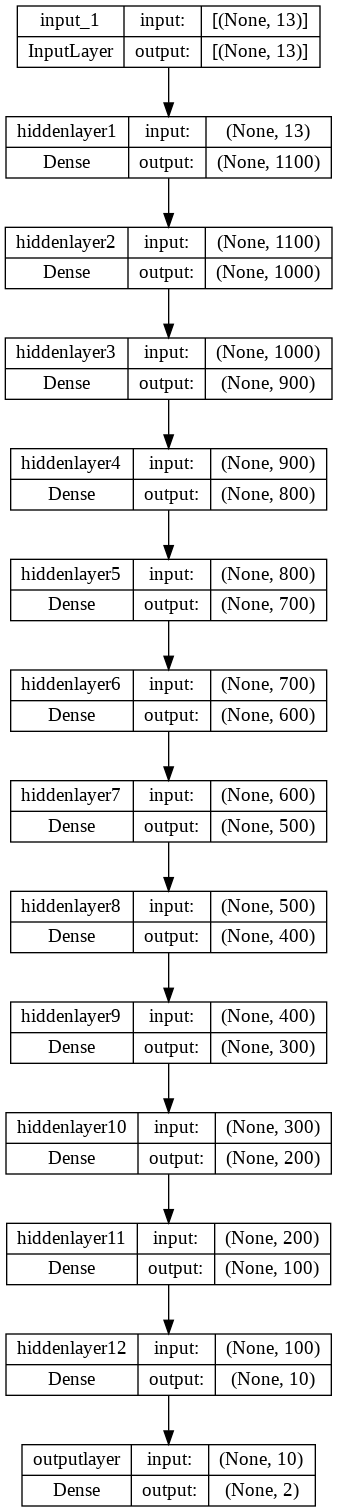

In [36]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file= 'model_plot.png', show_shapes = True, show_layer_names=True)

In [37]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

In [38]:
model_training = model.fit(x=x_trainscal, y=ynew_train, batch_size=32, validation_data=(x_validscal, y_valid), verbose=1, epochs=100)

Epoch 1/100
175/175 [==============================] - 21s 109ms/step - loss: 0.4829 - accuracy: 0.7957 - val_loss: 0.4615 - val_accuracy: 0.7900
Epoch 2/100
175/175 [==============================] - 9s 54ms/step - loss: 0.4615 - accuracy: 0.7973 - val_loss: 0.4674 - val_accuracy: 0.7900
Epoch 3/100
175/175 [==============================] - 9s 53ms/step - loss: 0.4391 - accuracy: 0.8004 - val_loss: 0.5435 - val_accuracy: 0.7925
Epoch 4/100
175/175 [==============================] - 9s 54ms/step - loss: 0.4251 - accuracy: 0.8109 - val_loss: 0.4371 - val_accuracy: 0.8250
Epoch 5/100
175/175 [==============================] - 9s 53ms/step - loss: 0.4390 - accuracy: 0.8059 - val_loss: 0.4325 - val_accuracy: 0.8175
Epoch 6/100
175/175 [==============================] - 9s 54ms/step - loss: 0.4340 - accuracy: 0.8109 - val_loss: 0.4500 - val_accuracy: 0.7900
Epoch 7/100
175/175 [==============================] - 9s 54ms/step - loss: 0.4334 - accuracy: 0.8025 - val_loss: 0.4038 - val_accurac

In [39]:
# History
pd.DataFrame(model_training.history)

,loss,accuracy,val_loss,val_accuracy
0,0.482943,0.795714,0.461471,0.790000
1,0.461483,0.797321,0.467445,0.790000
2,0.439102,0.800357,0.543532,0.792500
3,0.425082,0.810893,0.437112,0.825000
4,0.438951,0.805893,0.432469,0.817500
...,...,...,...,...
95,0.333995,0.851429,0.471611,0.798333
96,0.337593,0.846429,0.522176,0.811250
97,0.354626,0.846071,0.488777,0.789167
98,0.381906,0.828750,0.431323,0.802500


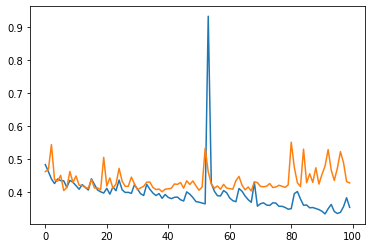

In [40]:
# Plot the Losses
plt.plot(model_training.history['loss'])
plt.plot(model_training.history['val_loss'])

In [47]:
# Predection
pred = model.predict(x_testscal).argmax(axis=-1)
pred

63/63 [==============================] - 1s 13ms/step


array([0, 0, 0, ..., 1, 0, 0])

In [48]:
# Evaluation
model.evaluate(x_testscal, y_test)

63/63 [==============================] - 1s 13ms/step - loss: 0.4219 - accuracy: 0.8230


[0.4218873679637909, 0.8230000138282776]

In [49]:
# Here we have printed confusion matrix for the classifier.
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, pred))

[[1510   97]
 [ 257  136]]


In [50]:
# Here we have printed classification report for the classifier.
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.85      0.94      0.90      1607
           1       0.58      0.35      0.43       393

    accuracy                           0.82      2000
   macro avg       0.72      0.64      0.66      2000
weighted avg       0.80      0.82      0.80      2000

